## **Import libraries**

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
plt.style.use('fivethirtyeight')

warnings.filterwarnings("ignore")

## **Import Dataset**

In [29]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset_copy = dataset.copy()
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [30]:
print(f"The size of the dataset is {dataset.shape}")

The size of the dataset is (200, 5)


In [31]:
# General statistics of the data
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#### Doesn't seem to have any outliers

In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#### No null values in our dataset

In [33]:
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [34]:
dataset.duplicated().sum()

0

#### Our dataset has neither null values nor duplicates

## Data Visualization

In [35]:
columns = ['ID', 'Gender', 'Age', 'Income', 'spending']
dataset.columns = columns
dataset.head()

,ID,Gender,Age,Income,spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


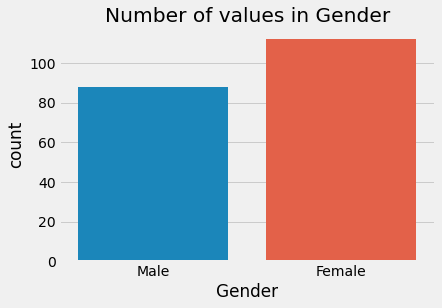

In [36]:
sns.countplot(x ='Gender', data=dataset);
plt.title("Number of values in Gender");

#### Our dataset has females more than males, which we have to consider while doing other analysis


In [37]:
#Encode our gender column
dataset.Gender = dataset.Gender.astype('category').cat.codes

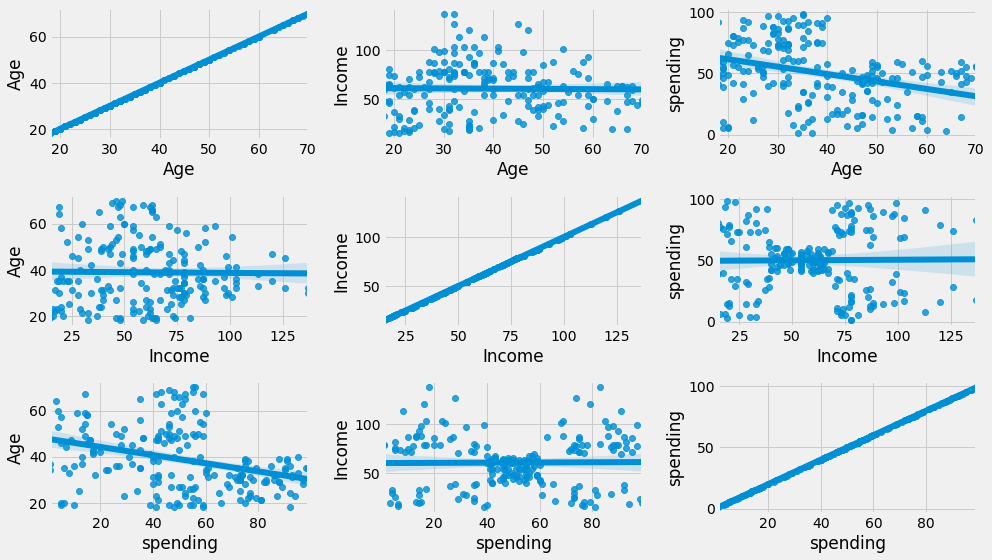

In [38]:
columns = ["Age" , "Income", "spending"]
fig, axs = plt.subplots(nrows=3, ncols=3)
fig.set_figwidth(14)
fig.set_figheight(8)
col = 0
row = 0

for i in range(9):
    sns.regplot(x=columns[row], y=columns[col], data=dataset, ax=axs[row, col])
    row += 1
    if row == 3:
        row = 0
        col += 1
plt.tight_layout()
        #encode

#### From scatter plot we can't get much information as all data are not that correlated, this is maybe due to our dataset size being small.

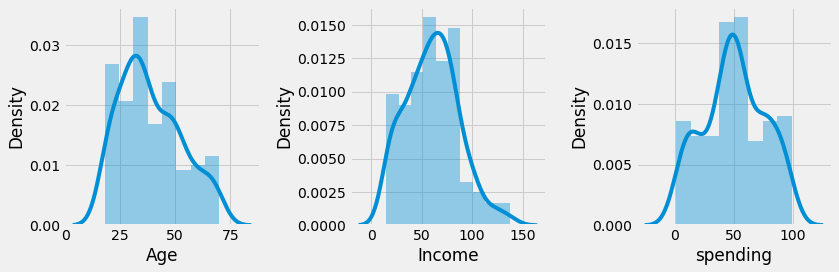

In [39]:
fig, ax = plt.subplots(1, 3)
fig.set_figwidth(12)

for i, feature in enumerate(columns):
    sns.distplot(dataset[feature], ax=ax[i])
plt.tight_layout()

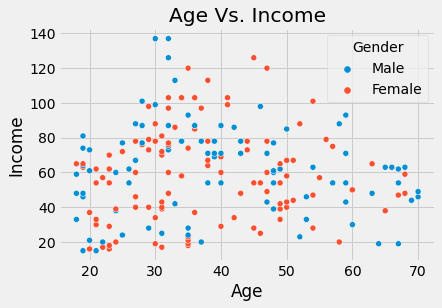

In [40]:
sns.scatterplot(x=dataset.Age, y=dataset.Income, hue=dataset_copy.Gender)
plt.title('Age Vs. Income');

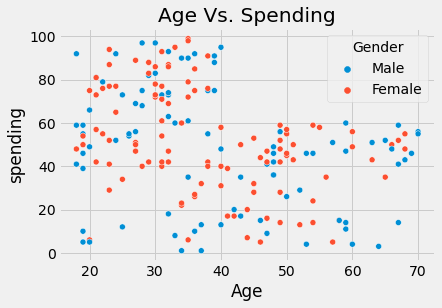

In [41]:
sns.scatterplot(x=dataset.Age, y=dataset.spending, hue=dataset_copy.Gender)
plt.title("Age Vs. Spending");

#### We can't get any useful information

## Encode the categorical column

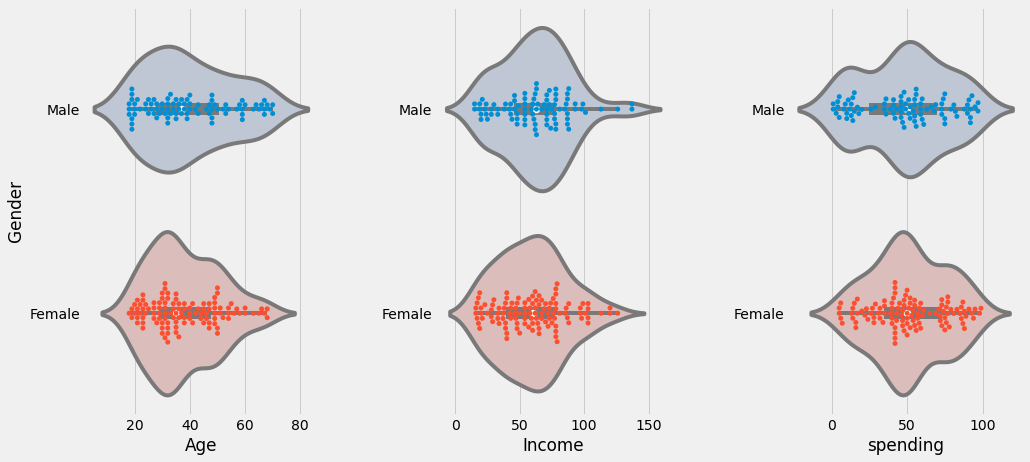

In [42]:
plt.figure(1, figsize = (15, 7))
n = 0

for col in columns:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.violinplot(x=dataset[col], y=dataset_copy["Gender"], palette='vlag')
    sns.swarmplot(x=dataset[col], y=dataset_copy["Gender"])
    plt.ylabel("Gender" if n == 1 else ' ')

## Segmentation

### Kmeans

In [43]:
from sklearn.cluster import KMeans, MeanShift, MiniBatchKMeans
def kmeans_elbow_method(dataset):
    '''returns a list with inertia value for number of clusters
    from 1 to 10'''
    inertia_list = []
    for n_cluster in range(1, 12):
        model = KMeans(n_clusters=n_cluster)
        model.fit(dataset)
        inertia_list.append(model.inertia_)
    return inertia_list

In [44]:
def kmeans_elbow_plot(inertia_list, title_, x=111):
    plt.subplot(x)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.lineplot(range(1, 12), inertia_list)
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.title(title_)
    plt.show()

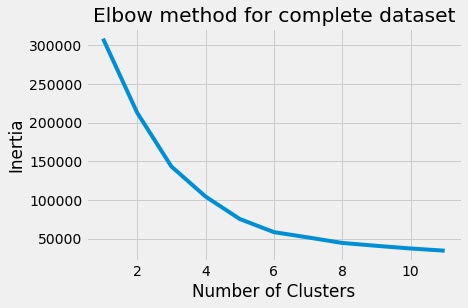

In [45]:
# Train with the whole dataset
inertia_list = kmeans_elbow_method(dataset.drop("ID", axis=1))
kmeans_elbow_plot(inertia_list, "Elbow method for complete dataset")

In [46]:
columns.append("Gender")

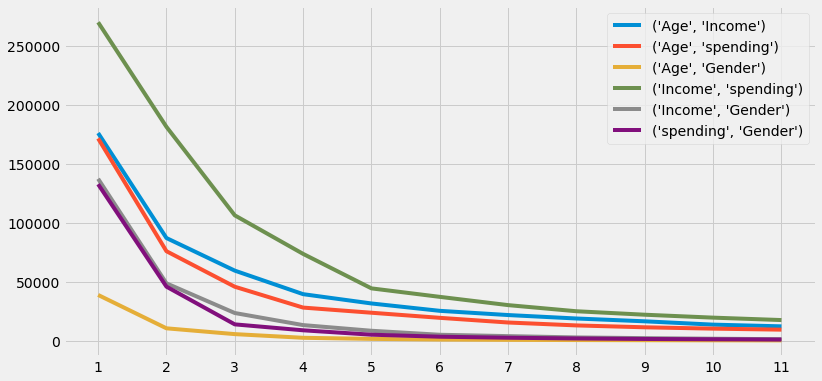

In [47]:
# With every two possible columns
plt.figure(figsize=(12, 6))
feature1_list = []
for feature1 in columns:
    for feature2 in columns:
        if feature1 != feature2 and feature2 not in feature1_list:
            inertia_list = kmeans_elbow_method(dataset[[feature1, feature2]])
            plt.plot(range(1, 12), inertia_list, label=f"{feature1, feature2}")
            plt.legend()
        feature1_list.append(feature1)
plt.xticks([i for i in range(1, 12)]);

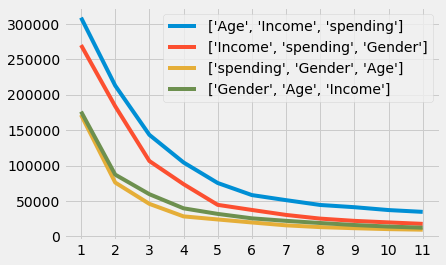

In [48]:
# one with the three features
three_features_com = [["Age", "Income", "spending"], ["Income", "spending", "Gender"], 
                      ["spending", "Gender", "Age"], ["Gender", "Age", "Income"]]

for comb in three_features_com:
    inertia_list = kmeans_elbow_method(dataset[comb])
    plt.plot(range(1, 12), inertia_list, label=f"{comb}")
    plt.legend()

plt.xticks([i for i in range(1, 12)])
plt.show()

#### we will try clustering with 3, 4 and 5 clusters

In [96]:
def cluster_regions(features, n_clusters_, model):
    h = 0.02
    x1 = dataset[["Income", "spending"]].iloc[:, :].values
    x_min, x_max = x1[:, 0].min() - 1, x1[:, 0].max() + 1
    y_min, y_max = x1[:, 1].min() - 1, x1[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    plt.imshow(z, interpolation="nearest", 
              extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                     cmap=plt.cm.Pastel2_r, aspect="auto", origin="lower")

In [97]:
def kmeans_fit(n_clusters_, features):
    model = KMeans(n_clusters=n_clusters_)
    predictions = model.fit_predict(dataset[features])
    cluster_centers = model.cluster_centers_
    return predictions, cluster_centers, model


def kmeans_plot(predictions, cluster_centers, feature1, feature2):
    sns.scatterplot(x=feature1, y=feature2, hue=predictions, data=dataset, palette="Set1", legend=False)
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], color="black", marker="s")
    plt.xlabel(f"{feature1}")
    plt.ylabel(f"{feature2}")
    plt.title(f"Clustering using {feature1} and {feature2}")
    plt.show()

In [98]:
def fit_and_plot_kmeans(features, n_clusters):
    predictions, cluster_centers, model = kmeans_fit(n_clusters, features)
    cluster_regions(features, n_clusters, model)
    kmeans_plot(predictions, cluster_centers, *features)

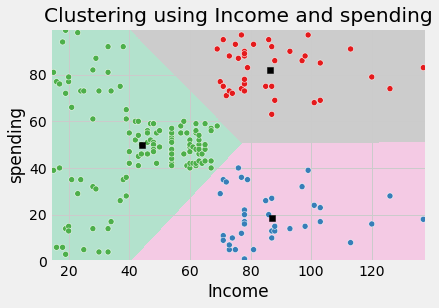

In [102]:
features = ["Income", "spending"]
fit_and_plot_kmeans(features, 3)

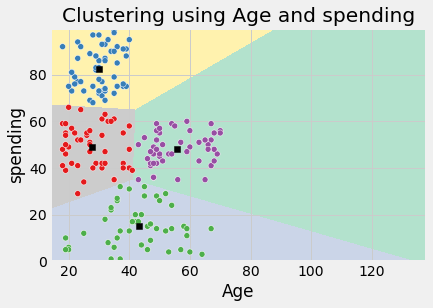

In [100]:
features2 = ["Age", "spending"]
fit_and_plot_kmeans(features2, 4)

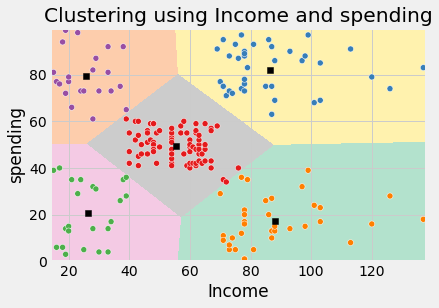

In [103]:
fit_and_plot_kmeans(features, 5)

In [113]:
def ward_fit(n_clusters_, features):
    model = AgglomerativeClustering(n_clusters=n_clusters_)
    predictions = model.fit_predict(dataset[features])
    return predictions


def ward_plot(predictions, feature1, feature2):
    sns.scatterplot(x=feature1, y=feature2, hue=predictions, data=dataset, palette="Set1", legend=False)
    plt.xlabel(f"{feature1}")
    plt.ylabel(f"{feature2}")
    plt.title(f"Clustering using {feature1} and {feature2}")
    plt.show()

# Done.